<a href="https://colab.research.google.com/github/krithikakondapalli/kpmg1c/blob/main/KPMG-1C-Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [1]:
import pandas as pd
from pandas import json_normalize
import requests
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported libraries successfully.")

Imported libraries successfully.


# Step 2: Acquire all ~470 rows - Get json data from folders themselves
Question: Do we need to import all json objects under each model? I know the video Dr. Uohna made picks the top one, but I am unsure. This could give us more data points for model building.

In [2]:
# YOU MUST DO THIS LINE AND REMOUNT AND GO THROUGH NECESSARY STEPS
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#trying to copy to local disk
!rsync -ah --info=progress2 "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/llm_text_generation/" "/content/llm_text_generation/"
!rsync -ah --info=progress2 "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/mllm_text_generation/" "/content/mllm_text_generation/"
!rsync -ah --info=progress2 "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/diffusion/" "/content/diffusion/"

        104.78K 100%    1.14kB/s    0:01:28 (xfr#318, to-chk=0/385)
         14.19K 100%    1.22kB/s    0:00:10 (xfr#44, to-chk=0/66)
         28.70K 100%    0.97kB/s    0:00:28 (xfr#124, to-chk=0/176)


## LLM Text Generation

In [4]:
base_dir = "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/llm_text_generation"  # your local base folder (should be the same in everyone's drive)

llm_text_generation = []

for root, _, files in os.walk(base_dir):
    for file in files:
        # Skip non-JSON and models.json
        if file.endswith(".json") and file.lower() != "models.json":
            path = os.path.join(root, file)
            try:
                with open(path, "r", encoding="utf-8") as f:
                    data = json.load(f)

                # Assign Task_Type based on folder
                if "chat" in path.lower():
                    data["Task_Type"] = "llm_text_generation/chat"
                elif "code" in path.lower():
                    data["Task_Type"] = "llm_text_generation/code"
                else:
                    data["Task_Type"] = "llm_text_generation/unknown"

                llm_text_generation.append(data)

            except Exception as e:
                print(f"Failed to load {path}: {e}")

# Convert list of dicts to DataFrame
df_llm_text_generation = pd.DataFrame(llm_text_generation)

# Optional: move Task_Type to first column
cols = ["Task_Type"] + [c for c in df_llm_text_generation.columns if c != "Task_Type"]
df_llm_text_generation = df_llm_text_generation[cols]

In [5]:
print(df_llm_text_generation.columns)
df_llm_text_generation.shape

Index(['Task_Type', 'Model', 'GPU', 'TP', 'PP', 'Energy/req (J)',
       'Avg TPOT (s)', 'Token tput (tok/s)', 'Avg Output Tokens',
       'Avg BS (reqs)', 'Max BS (reqs)'],
      dtype='object')


(314, 11)

In [6]:
df_llm_text_generation.head()

,Task_Type,Model,GPU,TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs)
0,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1,1,16.657673,0.061371,1607.859228,84.600610,126.970362,128
1,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1,1,17.700690,0.079200,1714.571278,98.635366,190.465331,192
2,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1,1,17.539938,0.106939,1776.423787,99.690244,315.570796,320
3,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1,1,17.170182,0.123768,1830.073008,101.851829,494.492837,512
4,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1,1,21.536224,0.047926,1194.772611,89.073780,63.496883,64


## MLLM Text Generation

In [7]:
base_dir = "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/mllm_text_generation"  # your local base folder (should be the same in everyone's drive)

mllm_text_generation = []

for root, _, files in os.walk(base_dir):
    for file in files:
        # Skip non-JSON and models.json
        if file.endswith(".json") and file.lower() != "models.json":
            path = os.path.join(root, file)
            try:
                with open(path, "r", encoding="utf-8") as f:
                    data = json.load(f)

                # Assign Task_Type based on folder
                if "chat" in path.lower():
                    data["Task_Type"] = "mllm_text_generation/chat"
                else:
                    data["Task_Type"] = "mllm_text_generation/unknown"

                mllm_text_generation.append(data)

            except Exception as e:
                print(f"Failed to load {path}: {e}")

# Convert list of dicts to DataFrame
df_mllm_text_generation = pd.DataFrame(mllm_text_generation)

# Optional: move Task_Type to first column
cols = ["Task_Type"] + [c for c in df_mllm_text_generation.columns if c != "Task_Type"]
df_mllm_text_generation = df_mllm_text_generation[cols]

In [8]:
print(df_mllm_text_generation.columns)
df_mllm_text_generation.shape

Index(['Task_Type', 'Model', 'GPU', 'TP', 'PP', 'Energy/req (J)',
       'Avg TPOT (s)', 'Token tput (tok/s)', 'Avg Output Tokens',
       'Avg BS (reqs)', 'Max BS (reqs)'],
      dtype='object')


(42, 11)

In [9]:
df_mllm_text_generation.head()

,Task_Type,Model,GPU,TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs)
0,mllm_text_generation/chat,microsoft/Phi-3-vision-128k-instruct,NVIDIA H100 80GB HBM3,1,1,105.845777,0.088476,576.057025,158.778,62.955386,64
1,mllm_text_generation/chat,facebook/chameleon-7b,NVIDIA H100 80GB HBM3,1,1,99.202554,0.055587,786.975169,202.732,63.383352,64
2,mllm_text_generation/chat,facebook/chameleon-30b,NVIDIA H100 80GB HBM3,2,1,266.390295,0.080684,562.113080,186.340,63.349794,64
3,mllm_text_generation/chat,facebook/chameleon-30b,NVIDIA H100 80GB HBM3,2,1,243.560061,0.099111,681.337546,185.734,124.563736,128
4,mllm_text_generation/chat,llava-hf/llava-1.5-7b-hf,NVIDIA H100 80GB HBM3,1,1,48.937824,0.076979,1012.821618,135.912,125.510490,128


## Diffusion: image-to-video, text-to-image, text-to-video

In [10]:
base_dir = "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/diffusion"
diffusion_data = []

for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".json") and file.lower() != "models.json":
            path = os.path.join(root, file)
            try:
                with open(path, "r", encoding="utf-8") as f:
                    data = json.load(f)

                # Determine Task_Type from folder name
                if "image-to-video" in path.lower():
                    data["Task_Type"] = "diffusion/image-to-video"
                elif "text-to-image" in path.lower():
                    data["Task_Type"] = "diffusion/text-to-image"
                elif "text-to-video" in path.lower():
                    data["Task_Type"] = "diffusion/text-to-video"
                else:
                    data["Task_Type"] = "diffusion/unknown"

                diffusion_data.append(data)

            except Exception as e:
                print(f"Failed to load {path}: {e}")

# Convert to DataFrame
df_diffusion = pd.DataFrame(diffusion_data)

# Optional: move Task_Type to first column
cols = ["Task_Type"] + [c for c in df_diffusion.columns if c != "Task_Type"]
df_diffusion = df_diffusion[cols]

In [11]:
print(df_diffusion.columns)
df_diffusion.shape

Index(['Task_Type', 'Model', 'GPU', 'Energy/video (J)', 'Batch latency (s)',
       'Batch size', 'Denoising steps', 'Frames', 'Energy/image (J)'],
      dtype='object')


(118, 9)

In [12]:
df_diffusion.head()

,Task_Type,Model,GPU,Energy/video (J),Batch latency (s),Batch size,Denoising steps,Frames,Energy/image (J)
0,diffusion/text-to-video,ali-vilab/text-to-video-ms-1.7b,NVIDIA A100-SXM4-40GB,1039.842375,10.828980,4,25,16.0,NaN
1,diffusion/text-to-video,ali-vilab/text-to-video-ms-1.7b,NVIDIA A100-SXM4-40GB,1001.890725,20.911451,8,25,16.0,NaN
2,diffusion/text-to-video,ali-vilab/text-to-video-ms-1.7b,NVIDIA A100-SXM4-40GB,1153.581700,3.237465,1,25,16.0,NaN
3,diffusion/text-to-video,ali-vilab/text-to-video-ms-1.7b,NVIDIA A100-SXM4-40GB,1088.232150,5.810183,2,25,16.0,NaN
4,diffusion/text-to-video,ali-vilab/text-to-video-ms-1.7b,NVIDIA A100-SXM4-40GB,1002.383056,42.212761,16,25,16.0,NaN


## COMBINE ALL DATA


In [14]:
df_all_tasks = pd.concat([df_llm_text_generation, df_mllm_text_generation, df_diffusion], ignore_index=True)

# Optional: move Task_Type to first column
cols = ["Task_Type"] + [c for c in df_all_tasks.columns if c != "Task_Type"]
df_all_tasks = df_all_tasks[cols]

print(f"Combined dataset shape: {df_all_tasks.shape}")
print(df_all_tasks["Task_Type"].value_counts())
print(df_all_tasks.columns)

Combined dataset shape: (474, 17)
Task_Type
llm_text_generation/chat     191
llm_text_generation/code     123
diffusion/text-to-image       86
mllm_text_generation/chat     42
diffusion/text-to-video       16
diffusion/image-to-video      16
Name: count, dtype: int64
Index(['Task_Type', 'Model', 'GPU', 'TP', 'PP', 'Energy/req (J)',
       'Avg TPOT (s)', 'Token tput (tok/s)', 'Avg Output Tokens',
       'Avg BS (reqs)', 'Max BS (reqs)', 'Energy/video (J)',
       'Batch latency (s)', 'Batch size', 'Denoising steps', 'Frames',
       'Energy/image (J)'],
      dtype='object')


In [ ]:
# PLEASE READ: ONLY RUN THIS CELL IF YOU WANT TO DOWNLOAD THE RAW CSV FILE
from google.colab import files

# Save CSV
df_all_tasks.to_csv("combined_tasks.csv", index=False)

# Download to your computer
files.download("combined_tasks.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
df_all_tasks.head()

,Task_Type,Model,GPU,TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs),Energy/video (J),Batch latency (s),Batch size,Denoising steps,Frames,Energy/image (J)
0,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,16.657673,0.061371,1607.859228,84.600610,126.970362,128.0,NaN,NaN,NaN,NaN,NaN,NaN
1,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.700690,0.079200,1714.571278,98.635366,190.465331,192.0,NaN,NaN,NaN,NaN,NaN,NaN
2,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.539938,0.106939,1776.423787,99.690244,315.570796,320.0,NaN,NaN,NaN,NaN,NaN,NaN
3,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.170182,0.123768,1830.073008,101.851829,494.492837,512.0,NaN,NaN,NaN,NaN,NaN,NaN
4,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,21.536224,0.047926,1194.772611,89.073780,63.496883,64.0,NaN,NaN,NaN,NaN,NaN,NaN


# Step 3: Explore Data

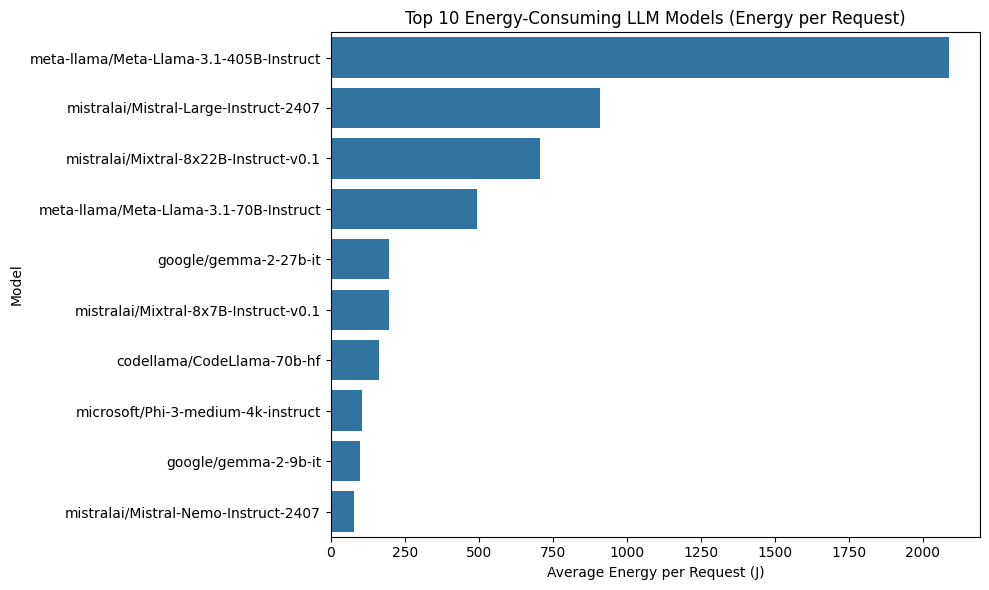

In [ ]:
# df_llm_text_generation
plt.figure(figsize=(10,6))
sns.barplot(
    data=(df_llm_text_generation.groupby("Model")["Energy/req (J)"]
          .mean()
          .reset_index()
          .sort_values("Energy/req (J)", ascending=False)
          .head(10)),
    x="Energy/req (J)",
    y="Model",
)
plt.title("Top 10 Energy-Consuming LLM Models (Energy per Request)")
plt.xlabel("Average Energy per Request (J)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


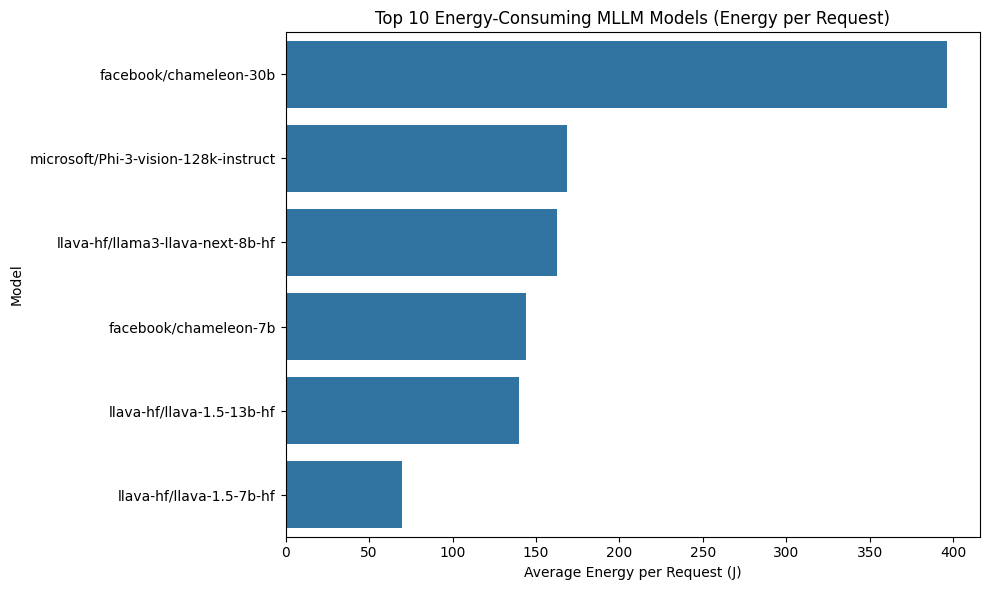

In [ ]:
# df_mllm_text_generation
plt.figure(figsize=(10,6))
sns.barplot(
    data=(df_mllm_text_generation.groupby("Model")["Energy/req (J)"]
          .mean()
          .reset_index()
          .sort_values("Energy/req (J)", ascending=False)
          .head(10)),
    x="Energy/req (J)",
    y="Model",
)
plt.title("Top 10 Energy-Consuming MLLM Models (Energy per Request)")
plt.xlabel("Average Energy per Request (J)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

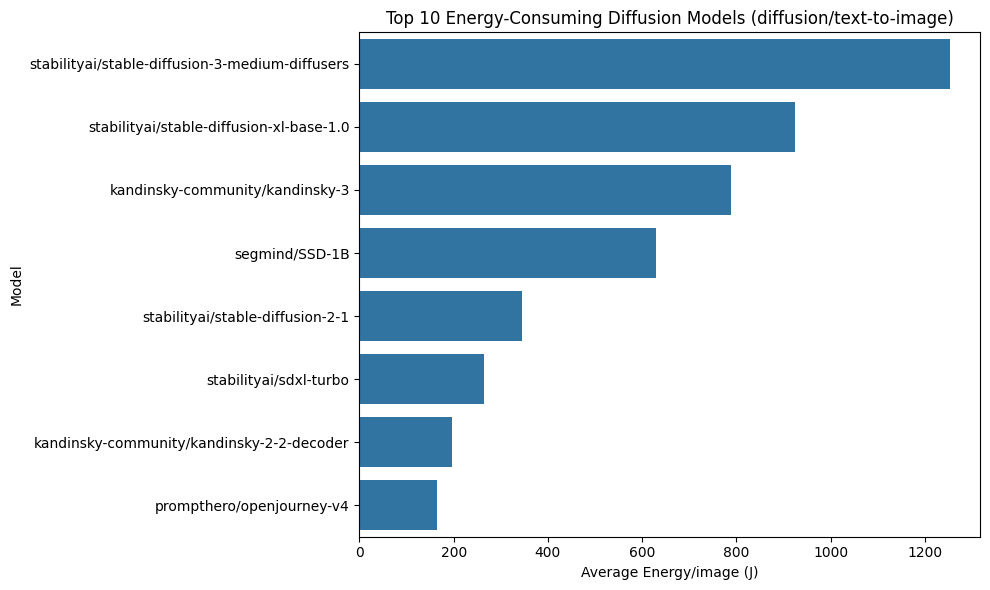

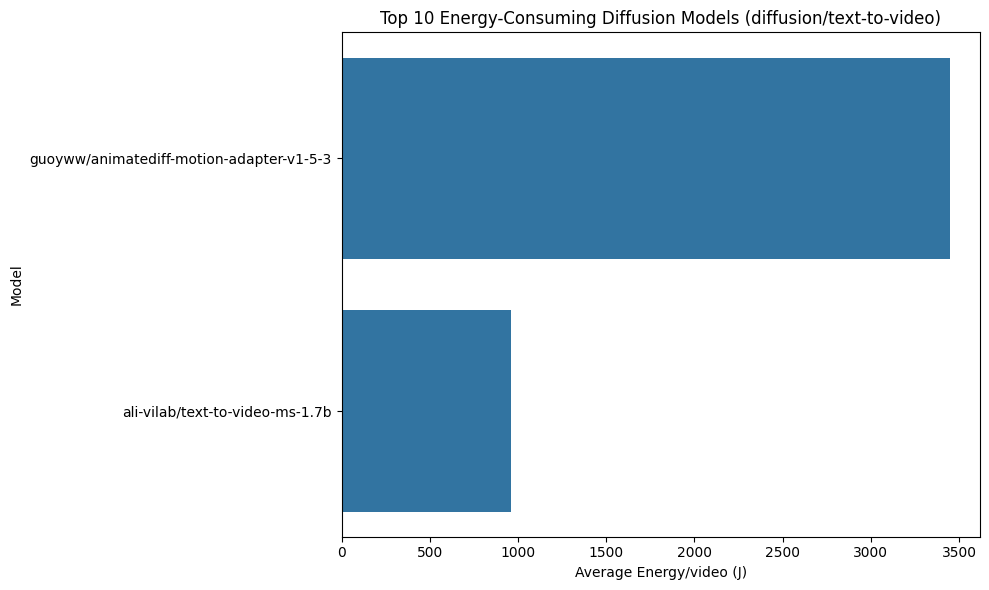

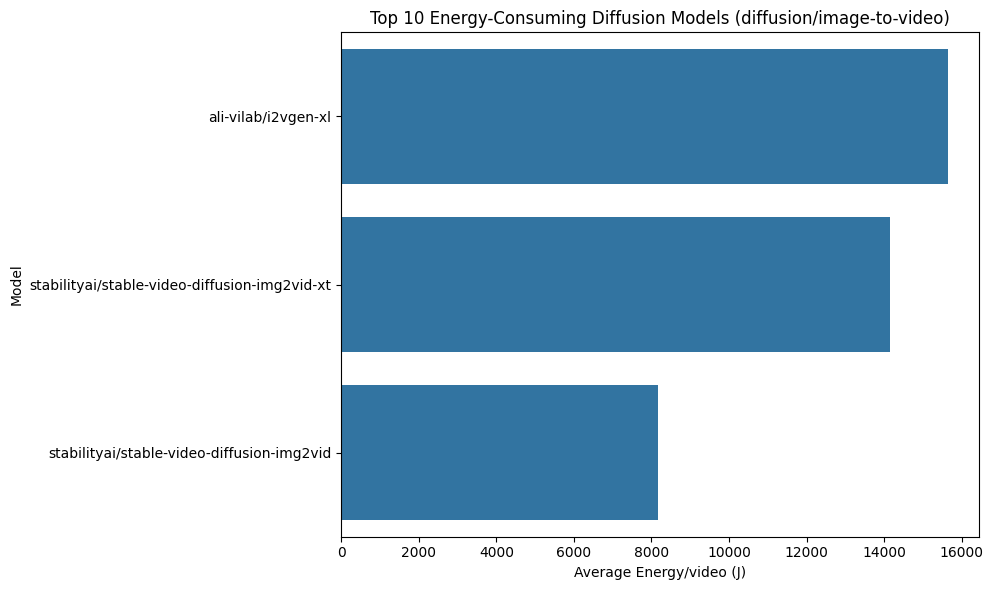

In [16]:
# df_diffusion
def plot_top_diffusion(df, task_type, energy_col, top_n=10):
    """Plot top N diffusion models for a given task type and energy metric."""
    df_task = df[df['Task_Type'] == task_type]
    top_models = (df_task.groupby("Model")[energy_col]
                  .mean()
                  .reset_index()
                  .sort_values(energy_col, ascending=False)
                  .head(top_n))

    plt.figure(figsize=(10,6))
    sns.barplot(data=top_models, x=energy_col, y="Model")
    plt.title(f"Top {top_n} Energy-Consuming Diffusion Models ({task_type})")
    plt.xlabel(f"Average {energy_col}")
    plt.ylabel("Model")
    plt.tight_layout()
    plt.show()

# Text-to-Image
plot_top_diffusion(df_diffusion, "diffusion/text-to-image", "Energy/image (J)")

# Text-to-Video
plot_top_diffusion(df_diffusion, "diffusion/text-to-video", "Energy/video (J)")

# Image-to-Video
plot_top_diffusion(df_diffusion, "diffusion/image-to-video", "Energy/video (J)")


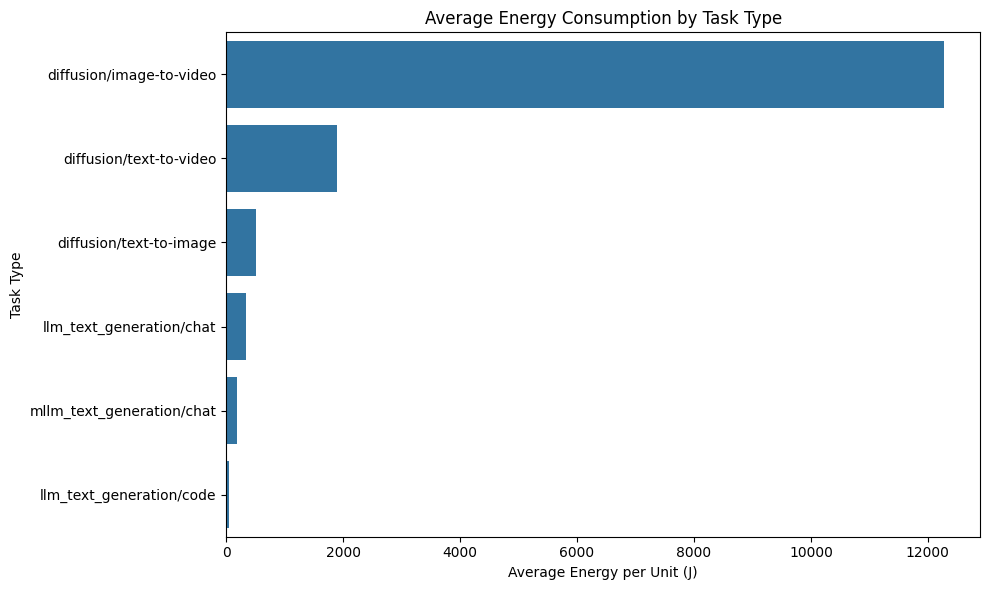

In [19]:
# average energy consumption per task type
import numpy as np

df = df_all_tasks.copy()
df['energy_unit_j'] = np.where(
    df['Task_Type'].str.contains("llm|mllm"), df['Energy/req (J)'],
    np.where(df['Task_Type'] == "diffusion/text-to-image", df['Energy/image (J)'],
             df['Energy/video (J)'])
)

avg_energy_by_task = (df.groupby("Task_Type")['energy_unit_j']
                        .mean()
                        .reset_index()
                        .sort_values('energy_unit_j', ascending=False))

plt.figure(figsize=(10,6))
sns.barplot(data=avg_energy_by_task, x='energy_unit_j', y='Task_Type')
plt.title("Average Energy Consumption by Task Type")
plt.xlabel("Average Energy per Unit (J)")
plt.ylabel("Task Type")
plt.tight_layout()
plt.show()

# Step 4: Clean and Standardize Data For Further Insights and Modeling

## Rename column names to be more standardized

In [21]:
# rename
rename_map_units = {
    "Task_Type": "task_type",
    "Model": "model",
    "GPU": "gpu",
    "TP": "tensor_parallelism",
    "PP": "pipeline_parallelism",
    "Energy/req (J)": "energy_per_request_j",
    "Avg TPOT (s)": "avg_tpot_s",
    "Token tput (tok/s)": "token_throughput_tok_per_s",
    "Avg Output Tokens": "avg_output_tokens",
    "Avg BS (reqs)": "avg_batch_size_reqs",
    "Max BS (reqs)": "max_batch_size_reqs",
    "Energy/video (J)": "energy_per_video_j",
    "Batch latency (s)": "batch_latency_s",
    "Batch size": "batch_size",
    "Denoising steps": "denoising_steps",
    "Frames": "frames",
    "Energy/image (J)": "energy_per_image_j",
}

df_all_tasks.rename(columns=rename_map_units, inplace=True)
df_all_tasks.head()


,task_type,model,gpu,tensor_parallelism,pipeline_parallelism,energy_per_request_j,avg_tpot_s,token_throughput_tok_per_s,avg_output_tokens,avg_batch_size_reqs,max_batch_size_reqs,energy_per_video_j,batch_latency_s,batch_size,denoising_steps,frames,energy_per_image_j
0,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,16.657673,0.061371,1607.859228,84.600610,126.970362,128.0,NaN,NaN,NaN,NaN,NaN,NaN
1,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.700690,0.079200,1714.571278,98.635366,190.465331,192.0,NaN,NaN,NaN,NaN,NaN,NaN
2,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.539938,0.106939,1776.423787,99.690244,315.570796,320.0,NaN,NaN,NaN,NaN,NaN,NaN
3,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.170182,0.123768,1830.073008,101.851829,494.492837,512.0,NaN,NaN,NaN,NaN,NaN,NaN
4,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,21.536224,0.047926,1194.772611,89.073780,63.496883,64.0,NaN,NaN,NaN,NaN,NaN,NaN


## Option A: Normalize Energy Output

**Before Normalization:**

llm_text_generation - energy/request

mllm_text_generation - energy/request

diffusion/text-to-image - energy/image

diffusion/text-to-video - energy/video

diffusion/image-to-video - energy/video

**After Normalization:**

llm_text_generation - energy/token

mllm_text_generation - energy/token

diffusion/text-to-image - energy/image

diffusion/text-to-video - energy/frame

diffusion/image-to-video - energy/frame


In [41]:
# make a copy to avoid modifying the original
df_all_tasks_normalized = df_all_tasks.copy()

# create a standardized energy metric
df_all_tasks_normalized["energy_normalized_j"] = np.select(
    [
        df_all_tasks_normalized["task_type"].str.contains("llm|mllm", case=False, na=False),
        df_all_tasks_normalized["task_type"] == "diffusion/text-to-image",
        df_all_tasks_normalized["task_type"].str.contains("video", case=False, na=False)
    ],
    [
        df_all_tasks_normalized["energy_per_request_j"] / df_all_tasks_normalized["avg_output_tokens"],  # J/token
        df_all_tasks_normalized["energy_per_image_j"],                                                   # J/image
        df_all_tasks_normalized["energy_per_video_j"] / df_all_tasks_normalized["frames"]                # J/frame
    ],
    default=np.nan
)

# preview the standardized dataset
df_all_tasks_normalized[["task_type", "model", "gpu", "energy_normalized_j"]].head()

,task_type,model,gpu,energy_normalized_j
0,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.196898
1,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.179456
2,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.175944
3,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.168580
4,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.241780


In [42]:
# drop the old energy columns
energy_cols = ["energy_per_request_j", "energy_per_image_j", "energy_per_video_j"]
df_all_tasks_normalized = df_all_tasks_normalized.drop(columns=energy_cols)

In [43]:
# view number of valid rows
total_rows = len(df_all_tasks_normalized)
valid_rows = df_all_tasks_normalized["energy_normalized_j"].notna().sum()
missing_rows = total_rows - valid_rows

print(f"Total rows: {total_rows}")
print(f"Rows with valid energy_normalized_j: {valid_rows}")
print(f"Rows without valid energy_normalized_j: {missing_rows}")

Total rows: 474
Rows with valid energy_normalized_j: 474
Rows without valid energy_normalized_j: 0


In [44]:
# fill the applicable empty rows with 0 - primarily for the columns where it is not applicable like diffusion and tokens
# RESEARCH THIS FURTHER NEED TO DOUBLE CHECK
columns_to_fill_zero = [
    "avg_output_tokens",  # not applicable for diffusion
    "frames",             # not applicable for LLMs
    "denoising_steps",    # not applicable for LLMs
    "tensor_parallelism",
    "pipeline_parallelism",
    "avg_tpot_s",
    "token_throughput_tok_per_s",
    "batch_latency_s",
    "batch_size",
    "avg_batch_size_reqs",
    "max_batch_size_reqs"
]

# Fill NaNs with 0
df_all_tasks_normalized[columns_to_fill_zero] = df_all_tasks_normalized[columns_to_fill_zero].fillna(0)
df_all_tasks_normalized[columns_to_fill_zero].isna().sum()

,0
avg_output_tokens,0
frames,0
denoising_steps,0
tensor_parallelism,0
pipeline_parallelism,0
avg_tpot_s,0
token_throughput_tok_per_s,0
batch_latency_s,0
batch_size,0
avg_batch_size_reqs,0


In [45]:
# check for other missing values
missing_counts = df_all_tasks_normalized.isna().sum()

# Filter only columns that have at least one missing value
missing_counts = missing_counts[missing_counts > 0]

print("Columns with missing values and their counts:")
print(missing_counts)

Columns with missing values and their counts:
Series([], dtype: int64)


In [46]:
# One hot encode the categorical features
categorical_cols = ["task_type", "model", "gpu"]
df_all_tasks_normalized = pd.get_dummies(
    df_all_tasks_normalized,
    columns=categorical_cols,
    drop_first=True
)

In [48]:
df_all_tasks_normalized.columns

Index(['tensor_parallelism', 'pipeline_parallelism', 'avg_tpot_s',
       'token_throughput_tok_per_s', 'avg_output_tokens',
       'avg_batch_size_reqs', 'max_batch_size_reqs', 'batch_latency_s',
       'batch_size', 'denoising_steps', 'frames', 'energy_normalized_j',
       'task_type_diffusion/text-to-image',
       'task_type_diffusion/text-to-video',
       'task_type_llm_text_generation/chat',
       'task_type_llm_text_generation/code',
       'task_type_mllm_text_generation/chat',
       'model_ali-vilab/text-to-video-ms-1.7b', 'model_bigcode/starcoder2-15b',
       'model_bigcode/starcoder2-3b', 'model_bigcode/starcoder2-7b',
       'model_codellama/CodeLlama-13b-hf', 'model_codellama/CodeLlama-34b-hf',
       'model_codellama/CodeLlama-70b-hf', 'model_codellama/CodeLlama-7b-hf',
       'model_facebook/chameleon-30b', 'model_facebook/chameleon-7b',
       'model_google/codegemma-1.1-2b', 'model_google/codegemma-7b',
       'model_google/gemma-2-27b-it', 'model_google/gemma-2-2

In [51]:
# scale the numerical features: may or may not help the linear regression model? we may need to tune after initial evaluation
from sklearn.preprocessing import StandardScaler
numeric_cols = df_all_tasks_normalized.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
df_all_tasks_normalized[numeric_cols] = scaler.fit_transform(df_all_tasks_normalized[numeric_cols])

# view the summary statistics
df_all_tasks_normalized[numeric_cols].describe()

,tensor_parallelism,pipeline_parallelism,avg_tpot_s,token_throughput_tok_per_s,avg_output_tokens,avg_batch_size_reqs,max_batch_size_reqs,batch_latency_s,batch_size,denoising_steps,frames,energy_normalized_j
count,474.000000,4.740000e+02,4.740000e+02,474.000000,4.740000e+02,4.740000e+02,474.000000,4.740000e+02,4.740000e+02,474.000000,4.740000e+02,4.740000e+02
mean,0.000000,5.996141e-17,2.998071e-17,0.000000,-5.996141e-17,2.998071e-17,0.000000,2.998071e-17,-1.199228e-16,0.000000,2.998071e-17,5.996141e-17
std,1.001057,1.001057e+00,1.001057e+00,1.001057,1.001057e+00,1.001057e+00,1.001057,1.001057e+00,1.001057e+00,1.001057,1.001057e+00,1.001057e+00
min,-0.817679,-1.608282e+00,-9.443646e-01,-1.284406,-1.159156e+00,-6.563529e-01,-0.648666,-3.020428e-01,-2.829901e-01,-0.575726,-2.624771e-01,-4.341501e-01
25%,-0.421381,4.354864e-01,-7.238343e-01,-1.028684,-8.272482e-01,-6.098672e-01,-0.603154,-3.020428e-01,-2.829901e-01,-0.575726,-2.624771e-01,-4.336570e-01
50%,-0.421381,4.354864e-01,-2.078332e-01,0.044394,-3.253996e-01,-2.855021e-01,-0.284563,-3.020428e-01,-2.829901e-01,-0.575726,-2.624771e-01,-4.320566e-01
75%,-0.025082,4.354864e-01,3.417980e-01,0.792961,1.008101e+00,9.098696e-02,0.079540,-3.020428e-01,-2.829901e-01,-0.575726,-2.624771e-01,-4.093503e-01
max,2.352708,2.479254e+00,6.525795e+00,2.534294,1.563018e+00,7.914921e+00,8.089806,1.029896e+01,7.621971e+00,1.736937,5.351879e+00,4.858222e+00


In [52]:
print("Means after scaling:")
print(df_all_tasks_normalized[numeric_cols].mean())

print("\nStandard deviations after scaling:")
print(df_all_tasks_normalized[numeric_cols].std())

Means after scaling:
tensor_parallelism            0.000000e+00
pipeline_parallelism          5.996141e-17
avg_tpot_s                    2.998071e-17
token_throughput_tok_per_s    0.000000e+00
avg_output_tokens            -5.996141e-17
avg_batch_size_reqs           2.998071e-17
max_batch_size_reqs           0.000000e+00
batch_latency_s               2.998071e-17
batch_size                   -1.199228e-16
denoising_steps               0.000000e+00
frames                        2.998071e-17
energy_normalized_j           5.996141e-17
dtype: float64

Standard deviations after scaling:
tensor_parallelism            1.001057
pipeline_parallelism          1.001057
avg_tpot_s                    1.001057
token_throughput_tok_per_s    1.001057
avg_output_tokens             1.001057
avg_batch_size_reqs           1.001057
max_batch_size_reqs           1.001057
batch_latency_s               1.001057
batch_size                    1.001057
denoising_steps               1.001057
frames                

## Linear Regression Model Using df_all_tasks_normalized

In [53]:
X = df_all_tasks_normalized.drop(columns=["energy_normalized_j"])  # features
y = df_all_tasks_normalized["energy_normalized_j"]                # target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MAE: 0.07994282629351514
R^2: 0.9818525098619562


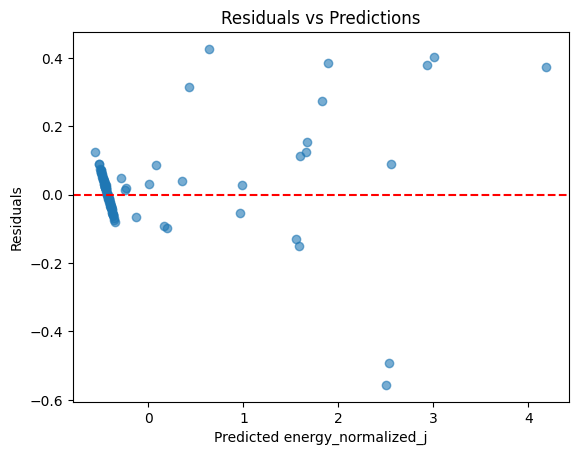

In [55]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted energy_normalized_j")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()

# Comment: there is random scatter around 0 which indicates the model is performing fairly well enough.


In [59]:
# Compare training set and testing set to evaluate for overfitting

# Train set predictions
y_train_pred = model.predict(X_train)

# Test set predictions
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MAE: {train_mae:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}, Test R²: {test_r2:.4f}")

Train MAE: 0.0646, Train R²: 0.9870
Test MAE: 0.0799, Test R²: 0.9819


## Option B: Make individual subsets (individual model for each task type) - could be a later approach for now

In [ ]:
# make subsets between llm, mllm, and diffusion